In [1]:
!pip install pandasql

In [21]:
#import pandas
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt

#read csv file into pandas data frame
df = pd.read_csv("food_order.csv", sep=",")

In [3]:
df.head(4)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15


In [4]:
df.count()

order_id                 1898
customer_id              1898
restaurant_name          1898
cuisine_type             1898
cost_of_the_order        1898
day_of_the_week          1898
rating                   1898
food_preparation_time    1898
delivery_time            1898
dtype: int64

In [29]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [30]:
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [32]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [34]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [35]:
#Look for duplicates
df[df.duplicated()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


In [36]:
#look for missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [37]:
#check for the unique values in the rating column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [39]:
#delete the "Not given" rows in the rating column
df.drop(df.index[df['rating']=='Not given'],inplace= True)

In [40]:
#checking if rows were dropped
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.162000e+03,1162.000000,1162.000000,1162.000000,1162.000000
mean,1.477520e+06,171939.471601,16.760766,27.381239,24.154045
std,5.468713e+02,114551.215031,7.572578,4.677922,4.930999
min,1.476547e+06,5139.000000,4.470000,20.000000,15.000000
25%,1.477062e+06,77540.000000,12.130000,23.000000,20.000000
50%,1.477524e+06,128655.500000,14.600000,27.000000,25.000000
75%,1.477992e+06,276066.250000,22.750000,32.000000,28.000000
max,1.478444e+06,403019.000000,35.410000,35.000000,33.000000


In [41]:
#checking the total count or rows
df.count()

order_id                 1162
customer_id              1162
restaurant_name          1162
cuisine_type             1162
cost_of_the_order        1162
day_of_the_week          1162
rating                   1162
food_preparation_time    1162
delivery_time            1162
dtype: int64

In [42]:
#convert rating column from object to integer
df['rating'] = df['rating'].astype('int64')

In [43]:
#check the summary statistics again
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.162000e+03,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000
mean,1.477520e+06,171939.471601,16.760766,4.344234,27.381239,24.154045
std,5.468713e+02,114551.215031,7.572578,0.741478,4.677922,4.930999
min,1.476547e+06,5139.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477062e+06,77540.000000,12.130000,4.000000,23.000000,20.000000
50%,1.477524e+06,128655.500000,14.600000,5.000000,27.000000,25.000000
75%,1.477992e+06,276066.250000,22.750000,5.000000,32.000000,28.000000
max,1.478444e+06,403019.000000,35.410000,5.000000,35.000000,33.000000


Dataset is clean now

# Analysis

In [55]:
#Find the average cost of an order
print(sqldf("select avg(cost_of_the_order) as Average_cost from df"))

   Average_cost
0     16.760766


In [60]:
#Top 5 restaurants with the highest cost per order
highest = sqldf("select restaurant_name, AVG(cost_of_the_order) as Average_cost from df group by restaurant_name order by AVG(cost_of_the_order) desc limit 5")
print(highest)

      restaurant_name  Average_cost
0   Kambi Ramen House     32.930000
1        Delicatessen     30.036667
2  Haru Gramercy Park     29.830000
3        Lucky Strike     29.250000
4          Il Bambino     29.250000


Kamni Ramen House has the highest average cost per order

Text(0, 0.5, 'cuisine count')

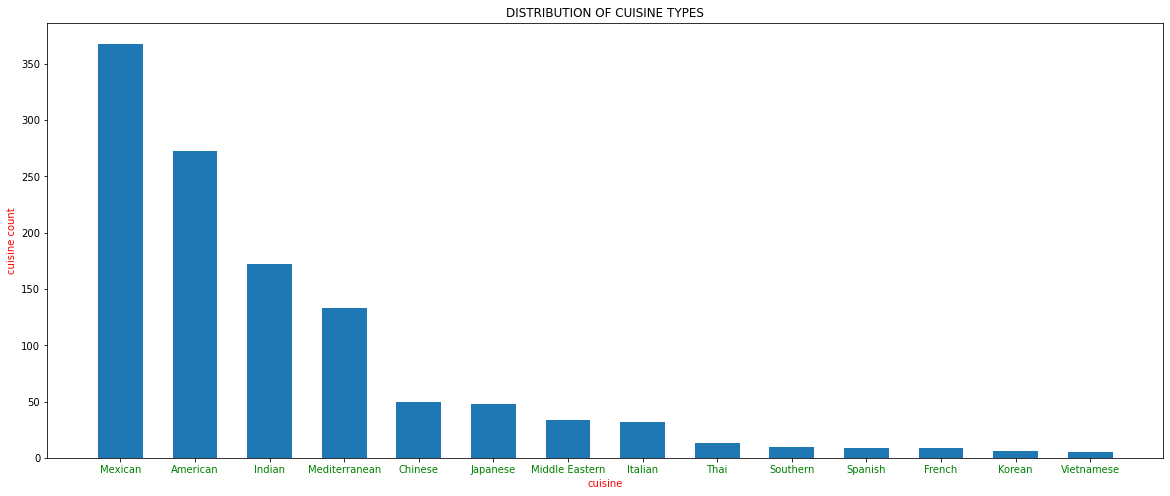

In [70]:
#create list of cuisine types
cuisines = df['cuisine_type'].unique()

#create counts of the cuisine type
cuisine_count = df['cuisine_type'].value_counts()

plt.figure(figsize=(20,8))
plt.bar(cuisines, cuisine_count, width=0.6, align='center')
plt.xticks(color='green')
plt.title('DISTRIBUTION OF CUISINE TYPES')
plt.xlabel('cuisine', color='red')
plt.ylabel('cuisine count', color='red')

From the chart above, Mexican dish is the most ordered dish and vietnamese is the least ordered

Weekend    822
Weekday    340
Name: day_of_the_week, dtype: int64


([<matplotlib.patches.Wedge at 0x1bb8b486970>,
 [Text(-0.8746462262624144, -0.6670786901744933, 'Weekend'),
  Text(0.8746462262624144, 0.6670786901744932, 'Weekday')],
 [Text(-0.4770797597794987, -0.3638611037315418, '70.7%'),
  Text(0.4770797597794987, 0.36386110373154174, '29.3%')])

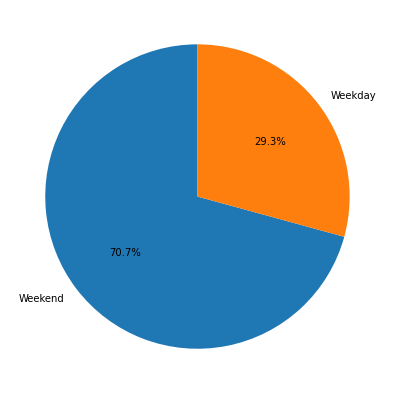

In [71]:
#count the days of the week
count_day=df['day_of_the_week'].value_counts()

print(count_day)

#create a piechart to visualise the info above
plt.figure(figsize=(7,7))
plt.pie(count_day,labels= count_day.index,autopct='%1.1f%%',startangle=90)

Orders are placed more on weekends